### E13 Project Face2Emoji

- 목적
    - 웹과 HTML, 자바스크립트의 기본 개념을 이해하고, 이를 활용하여 노트북 또는 스마트폰의 카메라에서 영상을 가져옵니다.
    - TensorFlow.js를 사용해 웹 브라우저에서 MobileNet을 구동합니다.
    - 사진에서 표정을 읽어 해당하는 이모티콘을 표시하는 간단한 웹 어플리케이션을 만듭니다.
    - 완성된 웹 어플리케이션을 GitHub Pages를 통해 인터넷에 올립니다.


#### 1. 데이터 불러오기

In [1]:
import numpy as np
import tqdm
import os

train_x = []
train_y = []
eval_x = []
eval_y = []

csv_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/data/fer2013.csv'

with open(csv_path) as f:
  for line in tqdm.tqdm(f.read().splitlines()[1:]):
    emotion, pixels, usage = line.split(',')
    
    x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
    y = int(emotion)

    if usage == 'PrivateTest':
      eval_x.append(x)
      eval_y.append(y)
    else:
      train_x.append(x)
      train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:25<00:00, 1411.97it/s]

train : 32298, eval :3589


Duplicate key in file PosixPath('/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 401 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')


Angry


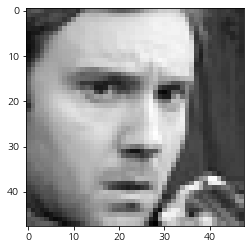

In [2]:
from matplotlib import pyplot as plt

LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

#### 2. 모델 학습
- 초기 설정된 값(epochs 100, batch_size 512)에서 모델의 성능을 더 향상 시키기 위해 epochs 175, batch_size 256으로 변경하여 학습을 진행 

In [8]:
import tensorflow as tf

# model 선언 
model = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 1), weights=None, classes=7)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metricics.CategoricalAccuracy()])

#model.fit
model.fit(np.stack(train_x),
          tf.keras.utils.to_categorical(train_y),
          epochs=175,
          batch_size=256,
          validation_data=(np.stack(eval_x),
                           tf.keras.utils.to_categorical(eval_y)))

Epoch 1/175
127/127 [==============================] - 6s 49ms/step - loss: 1.8181 - categorical_accuracy: 0.2471 - val_loss: 1.9189 - val_categorical_accuracy: 0.2449
Epoch 2/175
127/127 [==============================] - 6s 46ms/step - loss: 1.6808 - categorical_accuracy: 0.3297 - val_loss: 1.9138 - val_categorical_accuracy: 0.2449
Epoch 3/175
127/127 [==============================] - 6s 46ms/step - loss: 1.5550 - categorical_accuracy: 0.3905 - val_loss: 1.9200 - val_categorical_accuracy: 0.2449
Epoch 4/175
127/127 [==============================] - 6s 46ms/step - loss: 1.4528 - categorical_accuracy: 0.4390 - val_loss: 1.9442 - val_categorical_accuracy: 0.1655
Epoch 5/175
127/127 [==============================] - 6s 46ms/step - loss: 1.3798 - categorical_accuracy: 0.4697 - val_loss: 1.9367 - val_categorical_accuracy: 0.1655
Epoch 6/175
127/127 [==============================] - 6s 46ms/step - loss: 1.3032 - categorical_accuracy: 0.5032 - val_loss: 1.9322 - val_categorical_accuracy:

127/127 [==============================] - 6s 49ms/step - loss: 0.1116 - categorical_accuracy: 0.9604 - val_loss: 4.8519 - val_categorical_accuracy: 0.4525
Epoch 98/175
127/127 [==============================] - 6s 50ms/step - loss: 0.0914 - categorical_accuracy: 0.9676 - val_loss: 5.0371 - val_categorical_accuracy: 0.4528
Epoch 99/175
127/127 [==============================] - 6s 50ms/step - loss: 0.0936 - categorical_accuracy: 0.9667 - val_loss: 5.3248 - val_categorical_accuracy: 0.4503
Epoch 100/175
127/127 [==============================] - 6s 50ms/step - loss: 0.0903 - categorical_accuracy: 0.9699 - val_loss: 5.3288 - val_categorical_accuracy: 0.4427
Epoch 101/175
127/127 [==============================] - 6s 50ms/step - loss: 0.0676 - categorical_accuracy: 0.9765 - val_loss: 4.9063 - val_categorical_accuracy: 0.4689
Epoch 102/175
127/127 [==============================] - 6s 50ms/step - loss: 0.0716 - categorical_accuracy: 0.9745 - val_loss: 4.7498 - val_categorical_accuracy: 0.4

#### 3. 학습된 모델 내보내기

In [ ]:
import os
model_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/model.h5'
model.save(model_path)

#### 4. Troble Shooting

##### 4-1 Uncaught (in promise) Error : Provided weight data has no target variable : conv1_4/kernel
![img](./images/image.png)

해결 방법 : tensorflow-gpu, prompt-toolkit, tensorflowjs를 삭제후 다시 설치하고 재부팅 
##### 4-2 Uncaught (in promise) Error : Unknown layer : Functional.
![img2](./images/image1.png)

해결 방법 : 학습된 model을 convert한 model.json 파일에서 'Funtional' 부분을 'Model'로 변경하는 것으로 문제 해결 
[참고](https://github.com/tensorflow/tfjs/issues/3786)


#### 5. 고찰

- [결과 웹사이트](https://benestump.github.io/tfjs_mobile)
- 학습에 사용된 이미지와 예측을 하는데 사용되는 이미지의 차이
    - 학습은 얼굴 부분이 확대된 이미지들을 사용한 반면에 예측은 배경도 포함된 이미지를 
    사용하다보니 정확도가 더 떨어지는 문제가 있음
    - 이를 해결하기 위해 이전에 이미지에 스티커를 적용하는 부분에서 사용했던 이미지에서 
    얼굴을 찾아 부분적으로  crop하는 부분을 추가하여 표정 예측을 하는 경우 이미지를 잘라서 
    사용한다면 더 효과적일 것이라고 판단됨
- 환경에 따른 문제 
    - 동일한 시스템이어도 설치된 프로그램이나 모델의 버전에 따라 오류가 발생하는 경우가 발생 
    - convert를 수행할 때 프로그램의 버전을 일치하기 하도록 하고 오히려 서버를 이용하여 학습, 예측 등을 하는 서비스를 제공하는 것이 동일한 환경을 맞추는데에는 도움이 될것이라고 생각됨